In [ ]:
### World Data Science Institute Internship
#### Simple Stock Prediction Model using Reinforcement Learning
#### Portfolio Optimization (Part 5)
#### Deep Reinforcement Learning with Microsoft Azure

By Brandon Oppong-Antwi



----

Important Notes on Installations:

Python Version: Python 3.6-AzureML

Tensorflow Version: Tensorflow 2.3.0

Pytorch Version: Pytorch  1.6.0 with CUDA 101

Operating System: Windows 10

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
PATH = 'Users/brandono/'
directory_names = ['ALLY.csv','AXP.csv','BAC.csv','BRK-B.csv','C.csv','CFG.csv','COF.csv','GS.csv','JPM.csv','JRVR.csv','SQ.csv','WFC.csv']
stocks = [PATH + s for s in directory_names]
stocks

['Users/brandono/ALLY.csv',
 'Users/brandono/AXP.csv',
 'Users/brandono/BAC.csv',
 'Users/brandono/BRK-B.csv',
 'Users/brandono/C.csv',
 'Users/brandono/CFG.csv',
 'Users/brandono/COF.csv',
 'Users/brandono/GS.csv',
 'Users/brandono/JPM.csv',
 'Users/brandono/JRVR.csv',
 'Users/brandono/SQ.csv',
 'Users/brandono/WFC.csv']

In [23]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [24]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y
0,30.879999,117.599998,27.049999,200.899994,63.419998,32.889999,85.349998,198.970001,108.559998,49.110001,61.130001,46.090000
1,31.780001,118.400002,27.490000,202.190002,64.279999,33.250000,85.959999,201.729996,109.870003,49.619999,61.169998,46.500000
2,32.529999,120.669998,28.120001,204.240005,66.339996,34.200001,88.320000,207.050003,112.370003,49.740002,63.020000,47.619999
3,32.570000,120.190002,27.730000,204.729996,65.970001,34.139999,88.190002,207.210007,112.610001,50.150002,62.000000,47.150002
4,34.200001,119.919998,28.629999,206.619995,68.790001,35.720001,90.959999,211.979996,115.400002,50.880001,61.470001,48.410000


In [25]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [26]:
cov_matrix

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y
Close_x,0.002142,0.001418,0.001249,0.000684,0.001545,0.001674,0.001743,0.001135,0.001205,0.000914,0.001116,0.001286
Close_y,0.001418,0.001370,0.001129,0.000673,0.001338,0.001354,0.001458,0.001034,0.001057,0.000735,0.000955,0.001112
Close_x,0.001249,0.001129,0.001208,0.000644,0.001322,0.001363,0.001306,0.000996,0.001070,0.000631,0.000795,0.001154
Close_y,0.000684,0.000673,0.000644,0.000448,0.000727,0.000729,0.000720,0.000588,0.000599,0.000429,0.000491,0.000629
Close_x,0.001545,0.001338,0.001322,0.000727,0.001645,0.001658,0.001587,0.001164,0.001217,0.000758,0.000980,0.001305
Close_y,0.001674,0.001354,0.001363,0.000729,0.001658,0.001988,0.001720,0.001196,0.001287,0.000841,0.000971,0.001353
Close_x,0.001743,0.001458,0.001306,0.000720,0.001587,0.001720,0.001854,0.001186,0.001220,0.000824,0.001046,0.001316
Close_y,0.001135,0.001034,0.000996,0.000588,0.001164,0.001196,0.001186,0.001006,0.000924,0.000618,0.000767,0.000968
Close_x,0.001205,0.001057,0.001070,0.000599,0.001217,0.001287,0.001220,0.000924,0.001041,0.000633,0.000756,0.001051
Close_y,0.000914,0.000735,0.000631,0.000429,0.000758,0.000841,0.000824,0.000618,0.000633,0.001230,0.000499,0.000689


In [27]:
num_portfolios = 25000
results = np.zeros((3,num_portfolios))

In [28]:
for i in range(num_portfolios):
    weights = np.random.random(cov_matrix.shape[0])
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]

In [29]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

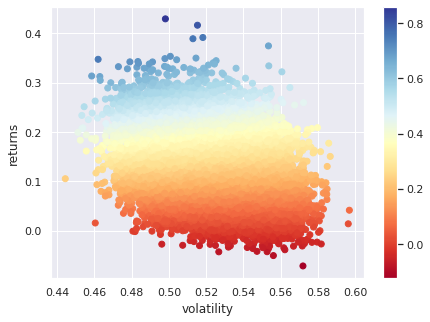

In [30]:
plt.figure(figsize = (7, 5))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.xlabel('volatility')
plt.ylabel('returns')
plt.show()